# 类（上）

Python 是一个面向对象的语言，在面向对象的理论中，有两个核心的概念：__类和实例__。类可以看成是一个模板，那么实例就是根据这个模板创建出来的对象。在 Python 里面，__类和实例都是对象，类叫做类对象、或者类型对象，实例叫做实例对象__。

为了避免后续出现歧义，我们这里把对象分为三种：
- __内置类对象__：比如int、str、list、type、object等等；
- __自定义类对象__：通过class关键字定义的类，当然后面我们也会把它和上面的内置类对象统称为类对象（或者说类型对象）；
- __实例对象__：由类对象(内建类对象或自定义类对象)创建的实例；

而对象之间存在以下两种关系：
- __is-kind-of__：对应面向对象理论中__父类和子类__之间的关系；
- __is-instance-of__：对应面向对象理论中__类和实例__之间的关系；

In [46]:
class Girl(object):  #  object 内置类对象；Girl 自定义类对象

    def say(self):
        return "古明地觉"

girl = Girl()        #  girl 实例对象
print(girl.say())

古明地觉


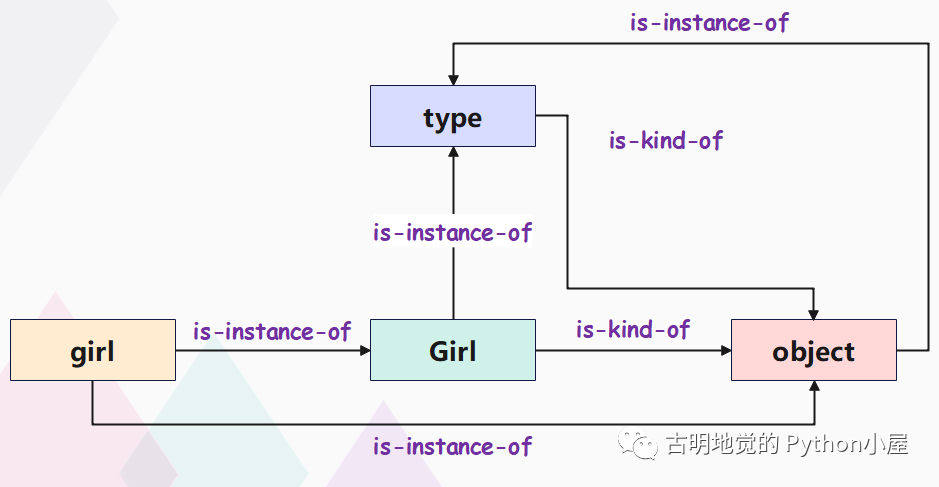

### 探测关系的方法：
- is-instance-of（实例和类）： _ _ class _ _ 属性；isinstance()函数；type()函数
- is-kind-of（子类和父类）： _ _ base _ _ 属性；_ _ bases _ _ 属性；issubclass()函数

In [14]:
print(girl.__class__)  # <class '__main__.Girl'>
print(Girl.__class__)  # <class 'type'>
print(object.__class__)  # <class 'type'>
print("------------")

print( isinstance(girl, Girl) )  # True
print( isinstance(girl, object) )  # True
print( isinstance(Girl, type) )  # True
print( isinstance(Girl, object) )  # True
print( isinstance(type, object) )  # True

<class '__main__.Girl'>
<class 'type'>
<class 'type'>
------------
True
False
True
True
True
True


In [47]:
print(type(girl)) # 实例对象的type是它所属的类
print(type(Girl)) # 类对象的type是它的元类
print(type(object))

<class '__main__.Girl'>
<class 'type'>
<class 'type'>


In [66]:
# __base__只显示继承的第一个类
print(Girl.__base__)  # <class 'object'>
# __bases__会显示继承的所有类
print(Girl.__bases__)  # (<class 'object'>,)
print(type.__bases__)  # (<class 'object'>,)
print("------------")

print( issubclass(Girl, type) )  # False
print( issubclass(Girl, object) )  # True
print( issubclass(type, object) )  # True

<class 'object'>
(<class 'object'>,)
(<class 'object'>,)
------------
False
True
True


### 设置类型和基类信息

In [54]:
class A:
    pass

class B(A):
    pass

class C(type): 
    pass

class D(B, C):
    pass

print(type(A))  #<class 'type'>
print(type(B))  #<class 'type'>
print(type(C))  #<class 'type'>
print(type(D))  #<class 'type'>
print("------------")

print(A.__base__)  # <class 'object'>  # 默认父类是 object

print(B.__base__)  # <class '__main__.A'>

print(C.__base__)  # <class 'type'>  # 设置继承自type后，父类是type

print(D.__base__)  # <class '__main__.B'>
print(D.__bases__)  # (<class '__main__.B'>, <class '__main__.C'>)

<class 'type'>
<class 'type'>
<class 'type'>
<class 'type'>
------------
<class 'object'>
<class '__main__.A'>
<class 'type'>
<class '__main__.C'>
(<class '__main__.B'>, <class '__main__.C'>)


-  A 没有显式地继承任何类，那么 tp_bases （底层指针）就是 NULL。但是 Python3 里面所有的类都默认继承了object，所以tp_base 就是 object。而 tp_bases，显然是 (object,)。

-  B 显式继承自 A ,因此 tp_base 就是 _ _ main _ _.A。

-  C 显式继承自 type ,因此 tp_base 就是 type。

-  D 同时继承多个类，那么 tp_base 就是先出现的那个基类。而 tp_bases 则是继承的所有基类，但是基类的基类是不会出现的，比如 object。


In [52]:
class MyType(type):  # MyType类继承自 type 类
    pass

class A(metaclass=MyType):  #在创建类时，通过在标注父类的同时指定元类（格式为metaclass=元类名）
    pass

class B(A):  # B 继承 A
    pass
    
print(type(MyType))  # <class 'type'>
print(type(A))  # <class '__main__.MyType'>
print(type(B))  # <class '__main__.MyType'>

<class 'type'>
<class '__main__.MyType'>
<class '__main__.MyType'>


我们看到B继承了A，而A的类型是MyType，那么B的类型也成了MyType。也就是说 A 是由 XX 生成的，那么B在继承A之后，B 也会由 XX 生成。另外，这里之所以用 XX 代替，是因为 Python 里面不仅仅只有 type 是元类，那些__继承了 type 的子类也可以是元类__。

### 属性设置
Python能够对属性进行动态添加。正如global名字空间一样，类也有自己的__属性字典__，往类里面设置属性的时候，等价于向字典中添加键值对，同理其它操作也与之类似。但是有一点需要注意：我们__不能直接通过类的属性字典来设置属性__。虽然叫做属性字典，但其实是mappingproxy对象，该对象本质上就是对字典进行了封装，在字典的基础上移除了增删改操作，也就是只保留了查询功能。如果我们__想给类增加属性，可以采用直接赋值的方式，或者调用 setattr 函数__也是可以的。

事实上调用 setattr 函数等价于调用其类型对象的 _ _ setattr _ _ 方法。

In [20]:
# 虽然有属性字典，但不可以直接在属性字典中添加键值对
try:
    Girl.__dict__["name"] = "古明地觉"
except Exception as e:
    print(e)  # 'mappingproxy' object does not support item assignment

'mappingproxy' object does not support item assignment


In [18]:
class Girl(object):
    pass

print(hasattr(Girl, "name"))  # False
Girl.name = "古明地觉"  # 直接赋值方法
print(hasattr(Girl, "name"))  # True
print(Girl.name)  # 古明地觉

False
True
古明地觉


In [2]:
class Girl(object):
    pass

print(Girl.__dict__.get("name", "不存在"))  # 不存在

# 等价于 Girl.name = "古明地觉"
# 等价于setattr(Girl, "name", "古明地觉")
type.__setattr__(Girl, "name", "古明地觉")  # setarrt 方法
print(Girl.__dict__.get("name", "不存在"))  # 古明地觉

不存在
古明地觉


### 属性查找
在属性查找时，首先从__对象本身__进行查找，没有的话会从__该对象的类型对象__中进行查找，还没有的话就从__类型对象所继承的父类__中进行查找。

In [64]:
# 以属性__call__为例，存在__call__属性，即为可调用对象
class A:
    def __call__(self, *args, **kwargs):
        print(self)
        return "古明地觉的 Python小屋"

class B(A):
    pass

class C(B):
    pass

c = C()

print(C())
print("------------")
print(c())

#print(hasattr(C, "__call__"))

------------
古明地觉的 Python小屋


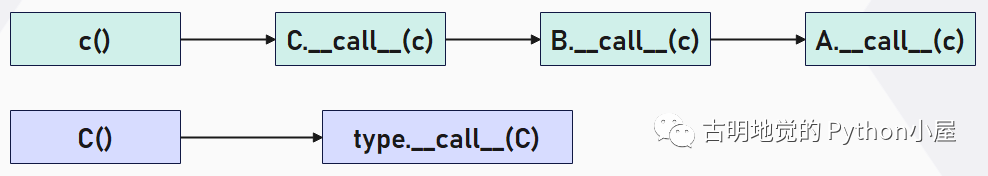

- 当调用类型对象 C 的时候，本质上是执行类型对象 C 的类型对象、也就是 type 里面的 _ _ call _ _ 函数
- 调用实例对象 c 的时候，本质上是执行类型对象 C 里面的 _ _ call _ _ 函数，但是 C 里面没有，这个时候沿着继承链进行属性查找，去找 C 继承的类里面的 _ _ call _ _ 函数。


- 所以，__所有的类对象都是可以调用的__，因为 type 是类对象的类对象，而 type 内部有 _ _call _ _ 函数。
- 至于__实例对象能否调用，就看其类对象、以及类对象所继承的父类是否定义了 _ _ call _ _ 函数__。
比如 str("xxx") 是合法的，因为 str 的类对象 type 里面定义了 _ _ call _ _；但 "xxx"() 则不合法、会报错，因为字符串的类对象 str、以及 str 所继承的父类里面没有 _ _ call _ _。

### 函数设置

In [21]:
class Girl(object):
    pass

Girl.info = lambda name: f"我是{name}"          
print(Girl.info("古明地觉"))  # 我是古明地觉     # 类调用

try:
    Girl().info("古明地觉")                      # 实例调用
except TypeError as e:
    print(e)  # 报错‘<lambda>() takes 1 positional argument but 2 were given’

# 如果实例调用的话，会和我们想象的不太一样，因为实例调用的话会将函数包装成方法
# 实例在调用的时候会将自身也作为参数传进去，所以第一个参数 name 实际上接收的是 Girl 的实例对象
# 只不过第一个参数按照规范来讲应该叫做self，但即便你起别的名字也是无所谓的

print(Girl().info())  # 我是<__main__.Girl object at 0x0000026C3ADD97C0>

我是古明地觉
<lambda>() takes 1 positional argument but 2 were given
我是<__main__.Girl object at 0x0000026C3ADD97C0>


In [ ]:
# 上述问题的解决方法有两种：
# 1.如果是给实例用的，那么带上一个 self 参数即可
Girl.info = lambda self, name: f"我是{name}"
print(Girl().info("古明地觉"))  # 我是古明地觉

# 2.将其包装成一个静态方法，这样类和实例都可以调用
Girl.info = staticmethod(lambda name: f"我是{name}")
print(Girl.info("古明地觉"))  # 我是古明地觉
print(Girl().info("古明地觉"))  # 我是古明地觉

此外，还可以通过type来动态地往类里面进行属性的增加、修改和删除。

In [51]:
class Girl(object):

    def say(self):
        pass

print(hasattr(Girl, "say"))  # True

# delattr(Girl, "say") 与之等价
type.__delattr__(Girl, "say")
print(hasattr(Girl, "say"))  # False

True
False


事实上调用 getattr、setattr、delattr 函数等价于调用其类型对象的 _ _ getattr _ _ 、_ _ setattr _ _ 、_ _ delattr _ _。

所以总结来说，__一个对象支持哪些行为，取决于其类型对象定义了哪些操作。并且通过对象的类型对象，可以动态地给该对象进行属性的设置__。Python所有类型对象的类型对象都是 type，通过type我们便可以控制类的生成过程，即便类已经创建完毕了，也依旧可以进行属性设置。

但是注意：上面说的仅仅针对我们自定义的类，内置的类是不行的。通过报错信息可以看到，__不可以设置内置类和扩展类的属性__。因为内置类对象在解释器启动之后，就已经初始化好了。至于扩展类就是我们使用Python/C API编写的扩展模块中的类，它和内置类是等价的。因此内置的类和使用class定义的类本质上是一样的，都是PyTypeObject对象，它们的类型在Python里面都是type。但区别就是__内置的类在底层是静态初始化的，我们不能进行属性的动态设置（通过 gc 模块实现除外）__。

但是为什么不可以对内置类和扩展类进行属性设置呢？首先我们要知道Python的动态特性是虚拟机赐予的，而虚拟机的工作就是将PyCodeObject对象翻译成C的代码进行执行，所以Python的动态特性就是在这一步发生的。
而内置的类(int、str、list等等)在解释器启动之后就已经静态初始化好了，直接指向 C 一级的数据结构，同理扩展类也是如此。它们相当于绕过了解释执行这一步，所以它们的属性不可以动态添加。

__内置的类它的实例对象__也是如此。我们看到它连自己的属性字典都没有，因为内置类对象的实例对象，内部有哪些属性，解释器记得清清楚楚。它们在底层都已经写死了，并且不允许修改，因此虚拟机完全没有必要为其实现属性字典（节省了内存占用）。

In [ ]:
a = 123
print(hasattr(a, "__dict__"))  # False 内置类的实例对象没有属性字典